# 1. Descripción del problema

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Un arreglo $[a_1',a_2',...,a_n']$ ordenado de menor a mayor, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

Este algoritmo se basa en un diseño conocido como **divide y vencerás** a diferencia de otros que hay por ahí, ya que, divide el arreglo en varios subarreglos que se irán fusionando para formar subarreglos ordenados hasta acabar con el arreglo ordenado de menor a mayor.


# 2. QuickSort



## 2.1 Código

In [23]:
import random
# QuickSort Code
def quickSort(arr, p, r, opcion, recursiones = 0, comparaciones = 0, verbose = False):
    if verbose == True:
      print("primera posición del arreglo =",p)
    if verbose == True:
      print("última posición del arreglo =",r)
    if verbose == True:
      print("\nContador de Recursiones: ", recursiones)
    if verbose == True:
      print("Arreglo de entrada:", arr[p:(r+1)])

    if r <= p:
        if verbose == True:
          print("Arreglo es de largo 1 o vacío.")
        return arr, recursiones, comparaciones #El arreglo sólo tiene un elemento

    if verbose == True:
      print("\nLlamando a partition")
    mid, comparaciones = partition(arr, p, r, opcion, comparaciones, verbose) #Combina y ordena ambos subarreglos ordenados

    if verbose == True:
      print("\nOrdenando izquierda:", arr[p:(mid+1)])
    recursiones += 1
    b, recursiones, comparaciones = quickSort(arr, p, mid, opcion, recursiones, comparaciones, verbose) #Ordena la parte izquierda del arreglo

    if verbose == True:
      print("\nOrdenando derecha:", arr[(mid+1):(r+1)])
    recursiones += 1
    c, recursiones, comparaciones = quickSort(arr, mid+2, r, opcion, recursiones, comparaciones, verbose) #Ordena la parte derecha del arreglo

    return arr, recursiones, comparaciones

# Función Partition
def partition(arr, p, r, opcion, comparaciones, verbose = False):
    # Eligiendo Pivote
    pivote = 0
    if verbose == True:
      print("Utilizando el método",opcion,"para elegir el pivote.")
    if opcion == 1:
        pivote = obtenerPivoteMetodo1(a, p, verbose)
    elif opcion == 2:
        pivote = obtenerPivoteMetodo2(a, r, verbose)
    elif opcion == 3:
        pivote = obtenerPivoteMetodo3(a, p, r, verbose)
    else:
        pivote = obtenerPivoteMetodo4(a, p, r, verbose)
 
    if verbose == True:
      print("índice del pivote",pivote)

    if verbose == True:
      print("Cambiando el Pivote por el último elemento")
    arr[pivote], arr[r] = arr[r], arr[pivote]
    if verbose == True:
      print("Arreglo después del cambio con el pivote:", arr[p:(r+1)])

    i = p

    if verbose == True:
      print("Ordenando arreglo:",arr[p:r],"Pivote [",arr[r],"]")
    for j in range((p),(r)):
        if verbose == True:
          print("\nComparando arr[j]=", arr[j],"\ncon pivote:",arr[r])

        comparaciones+=1
        if arr[j] <= arr[r]:
            if verbose == True:
              print("Pivote es Mayor o igual\nIntercambiando i:", arr[i]," con j:",arr[j])
            arr[i], arr[j] = arr[j], arr[i]
            i+=1
        else:
            if verbose == True:
              print("Pivote es Menor, sin cambios")
        if verbose == True:
          print("Arreglo actual:",arr[p:(r)])
        if verbose == True:
          print("con i=",i,"| j=",j+1)

    if verbose == True:
      print("Fin de la iteración, colocando pivote al centro")
    arr[i], arr[r] = arr[r], arr[i]
    if verbose == True:
      print("Arreglo final en partition:",arr[p:(r+1)])
    return i-1, comparaciones

# Método utilizando el primer valor
def obtenerPivoteMetodo1(arr, p, verbose = False):
    if verbose == True: print("Pivote =",arr[p])
    return p

# Método utilizando el último valor
def obtenerPivoteMetodo2(arr, r, verbose = False):
    if verbose == True:
      print("Pivote =",arr[r])
    return r

# Método eligiendo 3 números al azar y obteniendo la mediana
def obtenerPivoteMetodo3(a, p, r, comparaciones, verbose = False):
    if((r-p) < 4):
        return obtenerPivoteMetodo4(a, p, r, verbose)
    else:
        indice1 = random.randint(p,r)
        indice2 = indice1
        indice3 = indice1
        while indice2 == indice1:
            indice2 = random.randint(p,r)
        while indice3 == indice2 or indice3 == indice1:
            indice3 = random.randint(p,r)

        if a[indice1] <= a[indice2] <= a[indice3]:
            arr = [indice1 , indice2 , indice3]

        elif a[indice1] <= a[indice3] <= a[indice2]:
            arr = [indice1 , indice3 , indice2]

        elif a[indice2] <= a[indice1] <= a[indice3]:
            arr = [indice2 , indice1 , indice3]

        elif a[indice2] <= a[indice3] <= a[indice1]:
            arr = [indice2 , indice3 , indice1]

        elif a[indice3] <= a[indice1] <= a[indice2]:
            arr = [indice3 , indice1 , indice2]

        else:
            arr = [indice3 , indice2 , indice1]

        pivote = arr[1]
    return pivote

# Método utilizando el elemento del medio
def obtenerPivoteMetodo4(a, p, r, verbose = False):
    pivote = int((r+p+1)/2)
    if verbose == True: 
      print("Pivote =",a[pivote])
    return pivote

In [33]:
# Ejemplo
a = [9,2,4,5,3,1,6,8,8,7,1,1,3,5,1,5,1,3,4,5,5,10]
recursiones = comparaciones = 0
print("Entrada: ",a)
c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 3, recursiones, comparaciones, False)
print("\nSalida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [9, 2, 4, 5, 3, 1, 6, 8, 8, 7, 1, 1, 3, 5, 1, 5, 1, 3, 4, 5, 5, 10]

Salida:  [1, 1, 1, 1, 1, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 7, 8, 8, 9, 10]
Número de Recursiones: 32
Número de Comparaciones: 74


##2.2 Descripción del algoritmo

QuickSort al igual que el MergeSort que vimos anteriormente usa el paradigma de divide-y-vencerás. Los pasos que sigue son los siguientes para un arreglo $A[p..q]$:

Divide: Partir el arreglo A[p..q] in dos (posiblemente vacíos) subarreglos A[p..q-1] y A[q+1..r] tal que cada elemento de A[p..q-1] es menor o igual a un A[q], que, a su vez, es menor o igual que cada elemento de A[q+1..r]. Computar el índice q es parte de este procedimiento de partición.

Conquistar: Ordenar los dos subarreglos mencionados anteriormente mediante llamadas recursivas a quicksort.

Combinar: Debido a que los subarreglos ya se encuentran ordenados, no hay que hacer ningún trabajo para combinarlos, el arreglo A[p..r] está ordenado.

## 2.3 Correctitud del algoritmo

Caso base $(k = 1)$: El largo del arreglo es 1, y todo arreglo con dicho largo está siempre ordenado.

Hipótesis Inductiva $P(k)$: Asumimos que QuickSort retornará el resultado esperado para todo arreglo $P$ con $k$ elementos para $k < n$.

Caso inductivo: Si $P(k)$ es verdadero para $k < n$ entonces también lo será para $P(n)$, ya que, si $kIzq$ y $kDer$ son los largos de los subarreglos que están en las partes a izquierdas y derechas del pivote, entonces $kIzq , k Der < n$ (estrictamente menores que n).

Por nuestra hipótesis, los subarreglos de la izquierda y derecha siempre se ordenan correctamente y como el algoritmo partition es correcto, el pivote siempre estará en el lugar correcto. Por lo que el algoritmo es correcto.


###2.3.1 Correctitud del algoritmo partition

Este es un algoritmo que se usa en el QuickSort y que es esencial para su funcionamiento, y su invariante de ciclo sería:

Al principio de cada iteración del ciclo en las lineas 3-6, para cada arreglo A[p..r] de índice k:
p = inicio del arreglo
r = final del arreglo
i = final subarreglo izquierdo
j = inicio subarreglo derecho
x = pivote
k = índice


1. Si p <= k <= i, entonces A[k] <= x
2. Si i+1 <= k <= j-1, entonces A[k] > x
3. Si k = r, entonces A[k] = x

Inicialización: antes de la primera iteración del ciclo, i = p-1  y  j = p. Ya que no hay valores enter p y i y no hay valores entre i+1 y j-1, las primeras 2 condiciones están satisfechas. La línea 1 por su parte satisface la tercera condición.

Mantención: Hay dos casos, dependiendo de lo que ocurra en la cuarta línea, si A[j] > x la única acción que queda ees incrementar j, pero a pesar de ello, la segunda condición se mantiene para A[j-1]. Si A[j] <= x, el ciclo incrementa i, e intercambia A[i] y A[j] y luego incrementa j. Debido al cambio, ahora tenemos que A[i] <= x cumpliendo la primera condición. 

## 2.4 Análisis tiempo de ejecución
La complejidad temporal de este algoritmo depende en si el Partition está balanceado o no.

### Fórmula de recurrencia

La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

Para el caso base $n=1$ el algoritmo solo pregunta si el arreglo es de largo $1$ y luego retorna los valores sin realizar ninguna recursión, por esto se obtiene que $T(n)=O(1)$ si $n=1$.

Para el resto de casos se tiene que:

- La función **Partition** tiene un costo de $O(n)$ en todos los casos.

#### En el peor caso:

- El algoritmo divide el problema ($n$) en $2$ sub-problemas de largo $n-1$ y $0$ o $1$.

    Para el sub-problema de largo $0$ o $1$, el algoritmo retorna el valor sin realizar nada, por lo que tiene costo $O(1)$.

    Para el sub-problema de largo $n-1$ el algoritmo tardará $T(n-1) + O(n)$ en resolver el sub-problema.

Gracias a este analisis se obtiene que $T(n) = T(n-1) + O(n)$.

#### En el mejor y caso promedio:

- Partition produce $2$ sub-arreglos de igual tamaño $n/2$.

En este caso se tiene: $T(n) = 2T(n/2) + O(n)$

### **Teorema (Tiempo de ejecución).**

*El algoritmo **QuickSort** tiene un tiempo de ejecución que varía dependiendo de en qué caso se encuentra el arreglo:

#### Peor Caso: $O(n^2)$

Ocurre cuando la función **Partition** produce un sub-problema con $n-1$ elementos en un lado y $0$ en el otro, o sea, cuando se escoge el mayor o el menor elemento del arreglo.

#### Árbol de Recurrencia para el Peor Caso

Ahora con la fórmula de recurrencia se puede proceder a utilizar el árbol de recurrencia para demostrar la correctitud del teorema para el peor caso.

Se crea el árbol subdividiendo en cada paso $T(n)$ recursivamente en sus componentes, es decir: $T(n)= T(n-1) + T(0) + n$.

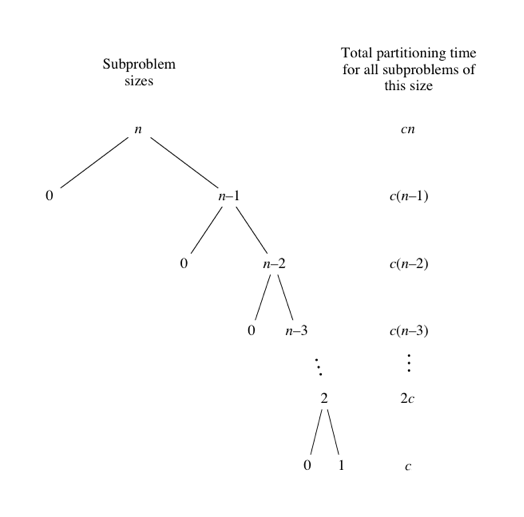

Al analizar el árbol, se observa que la altura del árbol es $n-1$ y el costo de ejecución en el nivel d es $c(n-d)$ por lo que el costo total es $\sum\limits_{i=1}^{n-1} n-1 = \frac{n(n-1)}{2}$.

Para la notación $O$ grande se ignoran las constantes por lo que se obtiene $O(n^2)$.

### Mejor y Caso Promedio: $O(n*log(n))$

El mejor caso ocurre cuando el pivote elegido es la mediana de todos los valores ordenados.

El caso promedio cuando el arreglo está desordenado y sus elementos no están ni en orden ascendente o descendente.

#### Teorema Maestro para el Mejor Caso y Caso Promedio

Utilizando el teorema maestro se puede obtener la complejidad temporal del algoritmo en el mejor caso y el caso promedio:

Se tiene $T(n) \leq aT(n/b)+O(n^d)$ donde $a=2$, $b=2$ y $d=1$.

Ya que $2 = 2^1$, la complejidad temporal es $O(n*log(n))$.

##2.5 Ejemplo de ejecución
###Arreglo
Veamos por ejemplo el siguiente arreglo:
$A = [3,5,4,2]$

Primero se ve si el largo del arreglo es igual a 1, como no es así, se llama a la función **Partition**, esta función toma un pivote, que sería 4 y lo coloca al final del arreglo.

$A = [3,5,2,4]$

Luego los valores que sean menores que el pivote serán colocados en el lado izquierdo del arreglo, y los mayores al derecho, tal que nos queda lo siguiente:

$A = [3,2,4,5]$

Ahora comenzarán las recursiones del **QuickSort** que se llamará para los lados izquierdos y derechos del arreglo.

####Lado Izquierdo
Aquí el **QuickSort** recibe los índices 0 y mid, que representan el subarreglo $[3,2]$ después partition toma como pivote al $2$, coloca los valores mayores a él en el lado derecho del subarreglo, tal que nos queda lo siguiente:

$subAIzq = [2,3]$

Luego se llama de nuevo al **QuickSort** para ver ambas mitades de este subarreglo, pero como estas son de largo 1, simplemente retornan y no hacen nada más.

####Lado Derecho
Se repite el proceso realizado anteriormente pero con el subarreglo $[4,5]$, se escoge un pivote y se reubican los elementos de la misma forma mencinonada anteriormente, quedándonos:

$subADer = [4,5]$

Luego se llama el **QuickSort** para ver ambas mitades de este subarreglo, pero como también son de largo 1, retornan y no hacen nada más.

Ahora que todos los procesos terminaron, nos queda el arreglo ordenado:

$A = [2,3,4,5]$

Y finaliza el proceso.





##2.6 Ejecución paso a paso (verbose = True)

In [13]:
a = [3,5,4,2]
recursiones = comparaciones = 0
print("Entrada: ",a)
c, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 4, recursiones, comparaciones, True)
print("\nSalida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [3, 5, 4, 2]
primera posición del arreglo = 0
última posición del arreglo = 3

Contador de Recursiones:  0
Arreglo de entrada: [3, 5, 4, 2]

Llamando a partition
Utilizando el método 4 para elegir el pivote.
Pivote = 4
índice del pivote 2
Cambiando el Pivote por el último elemento
Arreglo después del cambio con el pivote: [3, 5, 2, 4]
Ordenando arreglo: [3, 5, 2] Pivote [ 4 ]

Comparando arr[j]= 3 
con pivote: 4
Pivote es Mayor o igual
Intercambiando i: 3  con j: 3
Arreglo actual: [3, 5, 2]
con i= 1 | j= 1

Comparando arr[j]= 5 
con pivote: 4
Pivote es Menor, sin cambios
Arreglo actual: [3, 5, 2]
con i= 1 | j= 2

Comparando arr[j]= 2 
con pivote: 4
Pivote es Mayor o igual
Intercambiando i: 5  con j: 2
Arreglo actual: [3, 2, 5]
con i= 2 | j= 3
Fin de la iteración, colocando pivote al centro
Arreglo final en partition: [3, 2, 4, 5]

Ordenando izquierda: [3, 2]
primera posición del arreglo = 0
última posición del arreglo = 1

Contador de Recursiones:  1
Arreglo de entrada: [3, 2

#3. Experimentos

##3.1 Número de comparaciones experimentales comparados con el mejor y el peor caso teórico

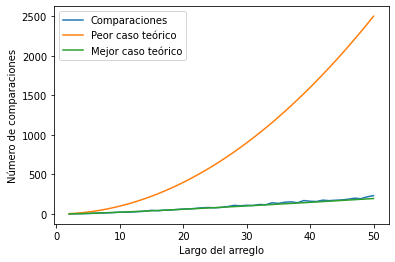

In [58]:
import matplotlib.pyplot as plt
import math
import random

rangeS = 2
rangeF = 51
x=[n for n in range(rangeS,rangeF)]

# Peor Caso
y1=[( n**2 ) for n in range(rangeS,rangeF)]
# Mejor caso
y2=[( n*math.log(n) ) for n in range(rangeS,rangeF)]
# Muestras
yc=[];


for n in range(rangeS,rangeF):
  a = random.sample(range(1, 100), n)
  recursiones = comparaciones = 0
  a, recursiones, comparaciones = quickSort(a, 0, (len(a)-1), 3, recursiones, comparaciones, False)
  yc.append(comparaciones)

plt.plot(x,yc)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Comparaciones", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

##3.2 Comparación QuickSort con el MergeSort

In [35]:
#MergeSort
def merge(arrIzquier, b, comparaciones, verbose = False):
    i = 0 ##indice para recorrer arrIzquier
    j = 0 ##indice para recorrer arrDer
    c = []

    while i < len(arrIzquier) and j < len(b):
        if verbose == True:
          print("\nComparando", arrIzquier[i], "y", b[j])

        comparaciones += 1

        if arrIzquier[i] < b[j]:
            c.append(arrIzquier[i])

            if verbose == True: 
              print("Agregado valor", arrIzquier[i], "=>",c)

            i+=1

        else:
            c.append(b[j])

            if verbose == True: 
              print("Agregado valor", b[j], "=>",c)

            j+=1


    if verbose == True:
      print("Agregando el resto de valores.")
    while i < len(arrIzquier):
        c.append(arrIzquier[i])
        i+=1
        comparaciones += 1

    while j < len(b):
        c.append(b[j])
        j+=1
        comparaciones += 1
    
    if verbose == True:
      print("Arreglo ordenado:",c,"\n")

    return c, comparaciones

# MergeSort Code
def merge_sort(arr, recursiones = 0, comparaciones = 0, verbose = False):
    arrIzq = []
    arrDer = []
    if verbose == True: print("\nContador de Recursiones: ", recursiones)
    if verbose == True: print("Arreglo de entrada:", arr)

    if len(arr) == 1:
        if verbose == True: print("Arreglo es de largo 1")
        return arr, recursiones, comparaciones #El arreglo sólo tiene un elemento

    x = (int)((len(arr))/2) #El índice de la mitad del arreglo

    if verbose == True:
      print("Indice de la mitad:", x)
    if verbose == True:
      print("Dividiendo arreglo")

    if verbose == True:
      print("\nOrdenando izquierda:", arr[0:x])
    recursiones += 1
    arrIzq, recursiones, comparaciones = merge_sort(arr[0:x], recursiones, comparaciones, verbose) #Ordena la parte izquierda del arreglo

    if verbose == True:
      print("\nOrdenando derecha:", arr[x:len(arr)])
    recursiones += 1
    arrDer, recursiones, comparaciones = merge_sort(arr[x:len(arr)], recursiones, comparaciones, verbose) #Ordena la parte derecha del arreglo

    if verbose == True:
      print("\nJuntando", arrIzq, "con", arrDer)
    arr, comparaciones = merge(arrIzq, arrDer, comparaciones, verbose) #Combina y ordena ambos subarreglos ordenados

    return arr, recursiones, comparaciones

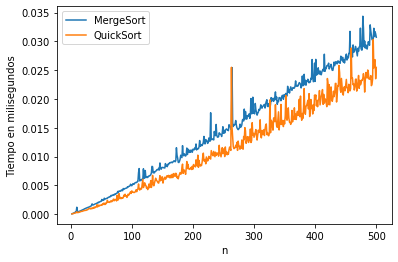

In [49]:
import datetime
import random
from timeit import repeat

x=[];
y=[];
yb=[];

for n in range(2,501):
  a = random.sample(range(1, 1000), n)
  x.append(n)

  t = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a})", repeat=1, number=10)
  y.append(t)
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 2)", repeat=1, number=10)
  yb.append(t)

plt.plot(x,y)
plt.plot(x,yb)
plt.legend(["MergeSort", "QuickSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

##3.3 Comparación rendimiento al modificar selección del pivote

Se compararán cuando el pivote es el último elemento del arreglo, el primero, cuando se saca la mediana de tres elementos escogidos al azar y cuando se escoge el elemento ubicado en la mitad del arreglo.

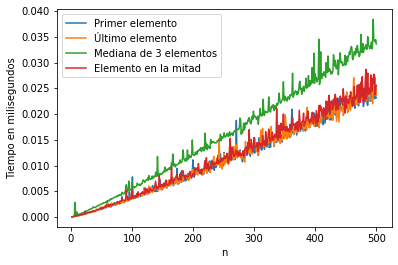

In [26]:
import datetime
import random
from timeit import repeat

x=[];
y1=[];
y2=[];
y3=[];
y4=[];

for n in range(2,501):
  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 1)", repeat=1, number=10)
  y1.append(t)
  
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 2)", repeat=1, number=10)
  y2.append(t)

  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 3)", repeat=1, number=10)
  y3.append(t)

  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, 0, (len({a})-1), 4)", repeat=1, number=10)
  y4.append(t)

  x.append(n)


plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(["Primer elemento","Último elemento","Mediana de 3 elementos","Elemento en la mitad"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

##3.4 Análisis de los datos obtenidos

###Comparación mejor y peor caso teórico
Como el mejor caso y el caso promedio tienen la misma complejidad, es de esperarse a que tiendan a estar relaticamente cerca uno del otro, aunque me parezca raro que estén tan cerca. Luego el peor caso está completamente separado de los otros dos al estar "escogiendo" el peor pivote posible para hacer el ordenamiento.

###Comparación entre mergeSort y quickSort
En cuanto a velocidad, el quickSort supera al mergeSort, un posible motivo podría ser debido a que no se molesta en crear arreglos auxiliares en su procedimiento. Pero algo que sí me llamo la atención fue el hecho de que el quickSort es bastante más inestable, lo que puede deberse al elemento escogido como pivote, aunque esto puede evitarse cambiando el proceso de selección al de la mediana de tres elementos, aunque eso produce que el algoritmo tome más tiempo debido a la implementación de dicho proceso.

###Modificación de la selección del pivote
Aquí el que tarda más tiempo con diferencia es el método en el que se saca la mediana de tres elementos, mientras que el resto se mantiene igualado. 

Un posible motivo para esto puede ser debido a la implementación, ya que cuando se saca un elemento aleatorio del arreglo, se llama a la función random.randint(). Lo que pasa con esto es que randint es una función de Python, que es un lenguaje mucho más lento comparado con C. Y lo que hace randint es llamar al randrange, que se asegura que el rango y el tamaño de los "pasos" de este sean enteros y que no sean 0, antes de llamar a getrandbits que está implementada en C y buscar el elemento aleatorio. Todos estos chequeos cuestan tiempo y afectan en el resultado final.